This is the I4 cdoe

01-BU

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('I4code').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/07 23:55:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


02-BU

In [2]:
# Reads schema and accepts that the data has a header.
df = spark.read.csv('Total_Emissions_Per_Country.csv', inferSchema=True, header=True)
# Let's see the data.
pandas_df = df.toPandas()
display(pandas_df)
print(pandas_df.describe())
df.printSchema()

23/10/07 23:55:49 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Country_ID,Country,Item,Element,Unit,year_2000,year_2001,year_2002,year_2003,year_2004,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,1,Afghanistan,All sectors with LULUCF,Emissions (CO2eq) (AR5),kilotonnes,13346.3,14189.1,17043.7,17744.1,17494.7,...,34730.9,32796.9,31062.4,31027.5,30274.8,29344.0,30582.7,30859.3,31732.1,32584.8
1,1,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,15734.4,14067.2,16921.8,17622.2,17372.8,...,34977.2,33043.1,31308.6,31273.7,30521.0,29189.4,30428.0,30704.7,31577.5,32430.2
2,1,Afghanistan,Agri-food systems,Emissions (CO2eq) (AR5),kilotonnes,12620.6,10835.6,13589.2,14132.3,14191.6,...,21036.2,20893.8,20510.9,21018.3,20457.7,20234.7,20242.7,20071.3,19800.6,20586.1
3,1,Afghanistan,All sectors with LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,11734.9,10395.5,12541.1,12982.6,13042.6,...,18265.2,18151.6,18168.9,18579.3,17768.2,17622.9,17483.2,17801.7,17864.3,18557.4
4,1,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,11734.4,10395.5,12541.1,12982.6,13042.6,...,18265.2,18151.6,18168.9,18579.3,17768.2,17622.9,17483.2,17801.7,17864.3,18557.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51217,246,Zimbabwe,Agricultural Soils,Emissions (CO2eq) (AR5),kilotonnes,29862.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51218,246,Zimbabwe,LULUCF,Emissions (CH4),kilotonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51219,246,Zimbabwe,LULUCF,Emissions (N2O),kilotonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51220,246,Zimbabwe,LULUCF,Emissions (CO2),kilotonnes,-88034.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


         Country_ID     year_2000     year_2001     year_2002     year_2003  \
count  51222.000000  5.122200e+04  5.122200e+04  5.122200e+04  5.122200e+04   
mean     122.581039  7.201523e+03  7.056349e+03  7.335957e+03  7.385641e+03   
std       71.062036  9.732015e+04  9.728942e+04  1.007120e+05  1.060188e+05   
min        1.000000 -8.651378e+05 -8.617439e+05 -8.378679e+05 -1.766582e+06   
25%       61.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%      121.000000  4.700000e+00  2.900000e+00  3.100000e+00  3.300000e+00   
75%      184.000000  3.284500e+02  2.590000e+02  2.756750e+02  2.869750e+02   
max      246.000000  7.089877e+06  6.949211e+06  6.996378e+06  7.041271e+06   

          year_2004     year_2005     year_2006     year_2007     year_2008  \
count  5.122200e+04  5.122200e+04  5.122200e+04  5.122200e+04  5.122200e+04   
mean   7.771828e+03  7.767026e+03  8.019653e+03  7.987908e+03  8.103048e+03   
std    1.121899e+05  1.162344e+05  1.211127e+05  1.

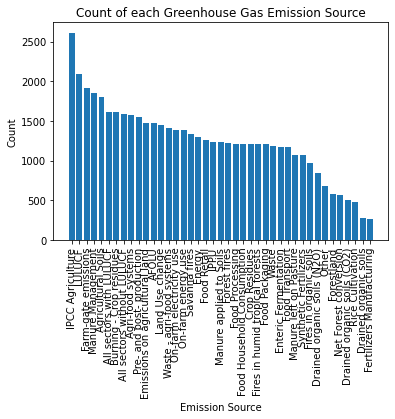

In [3]:
# Describe the data

from pyspark.sql.functions import col, count
import matplotlib.pyplot as plt
# Count the quantity of each 'Item' using PySpark API
emission_counts = df.groupBy("Item").agg(count("*").alias("count")).orderBy(col("count").desc())
# Collect data locally for visualization using matplotlib
local_data = emission_counts.collect()
# Extract the value of 'Item' and 'count'
items = [row['Item'] for row in local_data]
counts = [row['count'] for row in local_data]
# Visualization using matplotlib
plt.bar(items, counts)
plt.title('Count of each Greenhouse Gas Emission Source')
plt.ylabel('Count')
plt.xlabel('Emission Source')
plt.xticks(rotation=90)  # Rotate x-axis labels to make them more readable
plt.show()

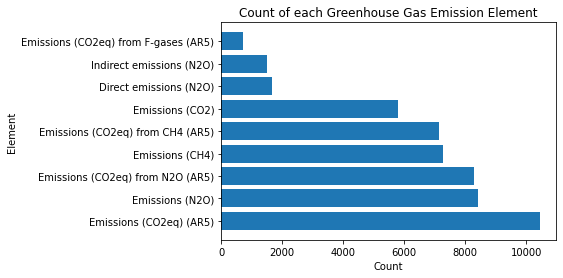

In [4]:
# Distribution Graph

from pyspark.sql.functions import col, count
import matplotlib.pyplot as plt
# Count the number of each 'Element' using PySpark API
element_counts = df.groupBy("Element").agg(count("*").alias("count")).orderBy(col("count").desc())
# Collect data locally for visualization using matplotlib
local_data = element_counts.collect()
# Extract the value of 'Element' and 'count'
elements = [row['Element'] for row in local_data]
counts = [row['count'] for row in local_data]
# Visualization using matplotlib
plt.barh(elements, counts)  # Draw horizontal bar chart using barh method
plt.title('Count of each Greenhouse Gas Emission Element')
plt.xlabel('Count')
plt.ylabel('Element')
plt.show()

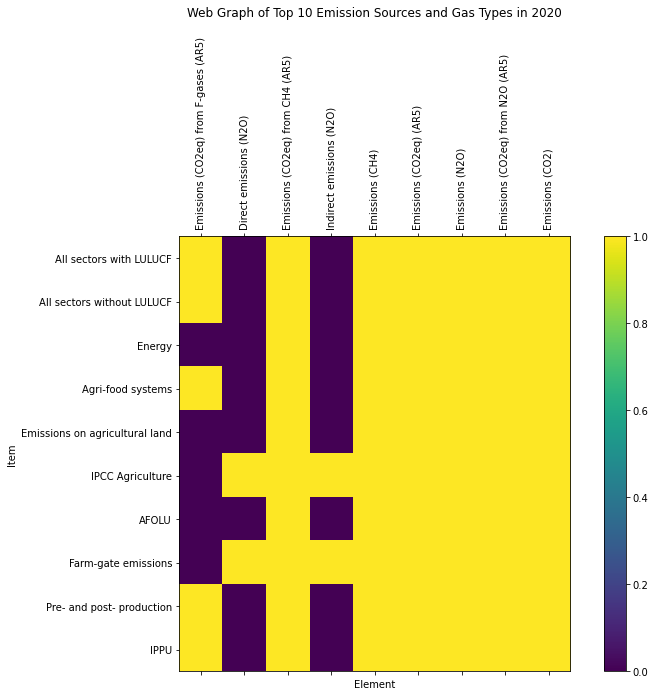

In [5]:
# Web Graph

from pyspark.sql.functions import col, sum, collect_list
import matplotlib.pyplot as plt
import numpy as np
# Calculating the top 10 emission sources in 2020
top_sources = df.groupBy("Item").agg(sum("year_2020").alias("total_2020")).orderBy(col("total_2020").desc()).limit(10)
top_sources_list = [row['Item'] for row in top_sources.collect()]
# Filter the original DataFrame using the top 10 emission sources
filtered_data = df.filter(df["Item"].isin(top_sources_list))
# Collect data locally for further processing
local_data = filtered_data.collect()
# Create an adjacency matrix
unique_items = top_sources_list
unique_elements = df.select("Element").distinct().rdd.flatMap(lambda x: x).collect()
adj_matrix = np.zeros((len(unique_items), len(unique_elements)))
for row in local_data:
    i = unique_items.index(row['Item'])
    j = unique_elements.index(row['Element'])
    adj_matrix[i, j] = 1
# Visualization using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(adj_matrix, cmap='viridis')
plt.title("Web Graph of Top 10 Emission Sources and Gas Types in 2020", pad=20)
plt.xticks(range(len(unique_elements)), unique_elements, rotation=90)
plt.yticks(range(len(unique_items)), unique_items)
plt.xlabel('Element')
plt.ylabel('Item')
fig.colorbar(cax)
plt.show()

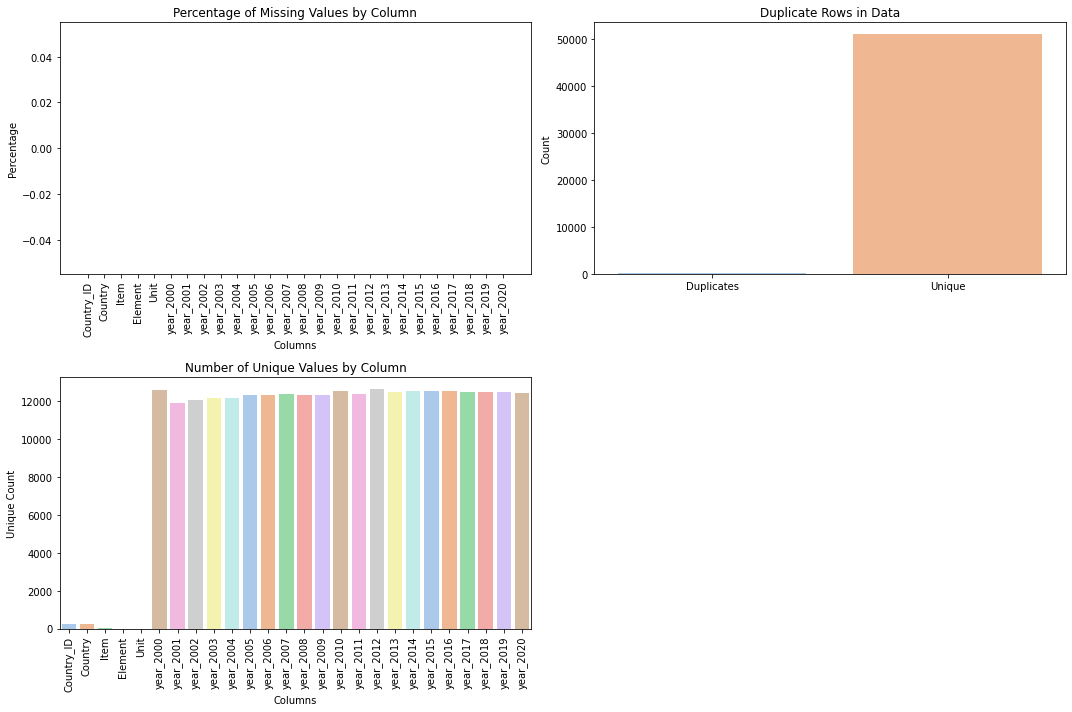

In [6]:
# Verify the data quality

from pyspark.sql.functions import col, count, countDistinct, when
import matplotlib.pyplot as plt
import seaborn as sns
missing_percentage = df.select([(count(when(col(c).isNull(), c)) / df.count()).alias(c) for c in df.columns])
missing_data = missing_percentage.collect()[0]
duplicates = df.count() - df.dropDuplicates().count()
unique_counts = df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns)).collect()[0]
# Visualization using matplotlib and seaborn
plt.figure(figsize=(15, 10))
# Missing value percentage plot
plt.subplot(2, 2, 1)
plt.bar(df.columns, [missing_data[c] for c in df.columns], color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=90)
# Repeating line graph
plt.subplot(2, 2, 2)
sns.barplot(x=['Duplicates', 'Unique'], y=[duplicates, df.count() - duplicates], palette='pastel')
plt.title('Duplicate Rows in Data')
plt.ylabel('Count')
# Plot of number of unique values per column
plt.subplot(2, 2, 3)
sns.barplot(x=list(df.columns), y=[unique_counts[c] for c in df.columns], palette='pastel')
plt.title('Number of Unique Values by Column')
plt.ylabel('Unique Count')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

03-DP

In [7]:
# Create a list of years

from pyspark.sql import functions as F
from pyspark.sql.types import StringType
from pyspark.sql.window import Window
from functools import reduce
years = ['year_' + str(year) for year in range(2000, 2021)]
condition = reduce(lambda x, y: x & y, [(df[year] >= 1) for year in years])
filtered_df = df.filter(condition)
# Count unique 'Item' for each 'Country'
source_counts = filtered_df.groupBy("Country").agg(F.countDistinct("Item").alias("Record_Count"))
# Join the source_counts with the filtered_df
df1 = filtered_df.join(source_counts, on="Country", how="left")
# Display the description
pandas_df1 = df1.toPandas()
display(pandas_df1)
print(pandas_df1.describe())

,Country,Country_ID,Item,Element,Unit,year_2000,year_2001,year_2002,year_2003,year_2004,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,Record_Count
0,Afghanistan,1,All sectors with LULUCF,Emissions (CO2eq) (AR5),kilotonnes,13346.3,14189.1,17043.7,17744.1,17494.7,...,32796.9,31062.4,31027.5,30274.8,29344.0,30582.7,30859.3,31732.1,32584.8,30
1,Afghanistan,1,All sectors without LULUCF,Emissions (CO2eq) (AR5),kilotonnes,15734.4,14067.2,16921.8,17622.2,17372.8,...,33043.1,31308.6,31273.7,30521.0,29189.4,30428.0,30704.7,31577.5,32430.2,30
2,Afghanistan,1,Agri-food systems,Emissions (CO2eq) (AR5),kilotonnes,12620.6,10835.6,13589.2,14132.3,14191.6,...,20893.8,20510.9,21018.3,20457.7,20234.7,20242.7,20071.3,19800.6,20586.1,30
3,Afghanistan,1,All sectors with LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,11734.9,10395.5,12541.1,12982.6,13042.6,...,18151.6,18168.9,18579.3,17768.2,17622.9,17483.2,17801.7,17864.3,18557.4,30
4,Afghanistan,1,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,11734.4,10395.5,12541.1,12982.6,13042.6,...,18151.6,18168.9,18579.3,17768.2,17622.9,17483.2,17801.7,17864.3,18557.4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26142,Zimbabwe,246,Agricultural Soils,Indirect emissions (N2O),kilotonnes,2.8,2.8,2.5,2.5,2.4,...,2.7,2.8,2.3,2.4,2.4,2.6,2.5,2.5,2.5,32
26143,Zimbabwe,246,Manure left on Pasture,Indirect emissions (N2O),kilotonnes,2.1,2.2,2.0,1.9,1.9,...,2.3,2.3,1.9,2.0,2.0,2.1,2.1,2.1,2.1,32
26144,Zimbabwe,246,Food Transport,Emissions (CO2eq) from N2O (AR5),kilotonnes,2.7,2.6,2.4,2.0,1.7,...,3.8,4.2,3.8,3.7,3.1,3.2,3.9,3.0,3.0,32
26145,Zimbabwe,246,Energy,Emissions (N2O),kilotonnes,1.3,1.3,1.3,1.2,1.2,...,1.5,1.6,1.6,1.6,1.6,1.6,1.7,1.7,1.8,32


         Country_ID     year_2000     year_2001     year_2002     year_2003  \
count  26147.000000  2.614700e+04  2.614700e+04  2.614700e+04  2.614700e+04   
mean     119.902398  1.410724e+04  1.399776e+04  1.444318e+04  1.461386e+04   
std       70.726129  1.323380e+05  1.318410e+05  1.361486e+05  1.421200e+05   
min        1.000000  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       58.000000  1.760000e+01  1.730000e+01  1.800000e+01  1.860000e+01   
50%      115.000000  1.971000e+02  1.900000e+02  1.973000e+02  2.098000e+02   
75%      179.000000  2.403250e+03  2.385300e+03  2.441000e+03  2.469350e+03   
max      246.000000  7.089877e+06  6.949211e+06  6.996378e+06  7.041271e+06   

          year_2004     year_2005     year_2006     year_2007     year_2008  \
count  2.614700e+04  2.614700e+04  2.614700e+04  2.614700e+04  2.614700e+04   
mean   1.528419e+04  1.544491e+04  1.602428e+04  1.601652e+04  1.619915e+04   
std    1.509145e+05  1.576092e+05  1.650762e+05  1.

In [8]:
# Define the classify_level function
def classify_level(record_count):
    if record_count < 20:
        return 'Level1'
    elif 20 <= record_count < 25:
        return 'Level2'
    elif 25 <= record_count < 30:
        return 'Level3'
    elif 30 <= record_count < 35:
        return 'Level4'
    else:
        return 'Level5'
# Register the function as a UDF
classify_level_udf = F.udf(classify_level, StringType())
# Add the Level_PollutionSources column
df1 = df1.withColumn("Level_PollutionSources", classify_level_udf(df1["Record_Count"]))
# Calculate the total emissions for the year 2020 for each country
country_sum = df1.groupBy("Country").agg(F.sum("year_2020").alias("year_2020_Sum"))
# Join the country_sum with df1
df2 = df1.join(country_sum, on="Country", how="left")
# Rank countries based on year_2020_Sum
ranking = country_sum.orderBy(F.desc("year_2020_Sum"))
ranking.show()

+--------------------+--------------------+
|             Country|       year_2020_Sum|
+--------------------+--------------------+
|      China mainland| 9.544250209999992E7|
|United States of ...| 4.645258499999999E7|
|               India|3.4146851599999994E7|
|              Brazil|2.2098532900000032E7|
|  Russian Federation|1.8374320100000013E7|
|           Indonesia|1.6125497199999992E7|
|Democratic Republ...|   9687573.700000001|
|               Japan|    9032334.30000002|
|Iran (Islamic Rep...|  7609443.8999999985|
|              Canada|           7317752.1|
|             Oceania|   6721269.100000001|
|              Mexico|           6406978.0|
|             Germany|   6160919.200000008|
|            Pakistan|           6135379.1|
|           Australia|   5321461.799999997|
|        Saudi Arabia|   5173696.799999996|
|             Türkiye|   4845613.799999997|
|           Argentina|   4653100.599999998|
|   Republic of Korea|   4535876.199999998|
|             Nigeria|   4535470

In [9]:
# Clean the EU dataset using the same steps
from pyspark.sql import functions as F
from pyspark.sql.types import StringType
from functools import reduce
file1 = 'Total_Emissions_of_European_Union.csv'
dfEU = spark.read.csv(file1, header=True, inferSchema=True)
pandas_df2 = dfEU.toPandas()
pandas_df2.info()
condition = reduce(lambda x, y: x & y, [(dfEU[year] >= 0) for year in years])
filtered_dfEU = dfEU.filter(condition)
EU_counts = filtered_dfEU.groupBy("Country").agg(F.countDistinct("Item").alias("Record_Count"))
dfEU1 = filtered_dfEU.join(EU_counts, on="Country", how="left")
dfEU1 = dfEU1.withColumn("Level_PollutionSources", classify_level_udf(dfEU1["Record_Count"]))
countryEU_sum = dfEU1.groupBy("Country").agg(F.sum("year_2020").alias("year_2020_Sum"))
dfEU2 = dfEU1.join(countryEU_sum, on="Country", how="left")
# Merge EU datasets
merged_data = df2.union(dfEU2)
pandas_df3 = merged_data.toPandas()
pandas_df3.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country_ID  267 non-null    int32  
 1   Country     267 non-null    object 
 2   Item        267 non-null    object 
 3   Element     267 non-null    object 
 4   Unit        267 non-null    object 
 5   year_2000   267 non-null    float64
 6   year_2001   267 non-null    float64
 7   year_2002   267 non-null    float64
 8   year_2003   267 non-null    float64
 9   year_2004   267 non-null    float64
 10  year_2005   267 non-null    float64
 11  year_2006   267 non-null    float64
 12  year_2007   267 non-null    float64
 13  year_2008   267 non-null    float64
 14  year_2009   267 non-null    float64
 15  year_2010   267 non-null    float64
 16  year_2011   267 non-null    float64
 17  year_2012   267 non-null    float64
 18  year_2013   267 non-null    float64
 19  year_2014   267 non-null    f

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 26406 non-null  object 
 1   Country_ID              26406 non-null  int32  
 2   Item                    26406 non-null  object 
 3   Element                 26406 non-null  object 
 4   Unit                    26406 non-null  object 
 5   year_2000               26406 non-null  float64
 6   year_2001               26406 non-null  float64
 7   year_2002               26406 non-null  float64
 8   year_2003               26406 non-null  float64
 9   year_2004               26406 non-null  float64
 10  year_2005               26406 non-null  float64
 11  year_2006               26406 non-null  float64
 12  year_2007               26406 non-null  float64
 13  year_2008               26406 non-null  float64
 14  year_2009               26406 non-null

In [10]:
#Delete Unit field
merged_df = merged_data.drop("Unit")
pandas_df4 = merged_df.toPandas()
display(pandas_df4)

,Country,Country_ID,Item,Element,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,Record_Count,Level_PollutionSources,year_2020_Sum
0,Chad,43,All sectors with LULUCF,Emissions (CO2eq) (AR5),48967.2,51585.3,54412.5,56954.7,59768.5,61715.9,...,91172.7,95992.1,99022.5,101055.8,105469.5,108121.5,113426.7,30,Level4,1769409.1
1,Chad,43,Agri-food systems,Emissions (CO2eq) (AR5),42544.2,49037.3,51663.2,54105.0,55705.3,57459.2,...,86250.4,91027.4,93777.9,95565.6,99839.7,102634.0,107880.1,30,Level4,1769409.1
2,Chad,43,AFOLU,Emissions (CO2eq) (AR5),45676.2,47961.0,50586.2,53001.0,54579.7,56311.4,...,84893.3,89654.6,92332.7,94070.5,98341.6,101110.0,106357.3,30,Level4,1769409.1
3,Chad,43,Emissions on agricultural land,Emissions (CO2eq) (AR5),41502.5,47968.6,50570.9,52984.9,54557.3,56282.2,...,84819.0,89565.3,92289.2,94054.3,98302.1,101083.4,106317.9,30,Level4,1769409.1
4,Chad,43,All sectors without LULUCF,Emissions (CO2eq) (AR5),36893.9,33883.7,36480.9,38619.3,41441.7,43889.9,...,64101.8,68835.3,73598.6,76276.8,80812.0,83666.8,88986.9,30,Level4,1769409.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,European Union (27),247,All sectors without LULUCF,Emissions (CO2),3533579.3,3616839.0,3600970.0,3664282.2,3670081.7,3653772.7,...,2983642.8,3041858.5,3043743.0,3068826.6,3043664.4,2915519.4,2574572.9,40,Level5,31888900.4
26402,European Union (27),247,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),98790.8,92458.3,97627.3,101941.8,106230.7,112032.6,...,195513.5,205220.7,211688.2,214303.3,218468.6,211344.7,197141.0,40,Level5,31888900.4
26403,European Union (27),247,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),646079.0,633581.8,627598.1,619903.4,616850.9,603334.8,...,547764.2,546043.9,538322.1,538406.5,528455.4,514308.2,505053.4,40,Level5,31888900.4
26404,European Union (27),247,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),267459.0,263494.1,264174.8,264985.4,265125.2,264821.6,...,243467.7,245050.4,244227.2,245633.9,239507.6,235166.4,228293.4,40,Level5,31888900.4


04-DT

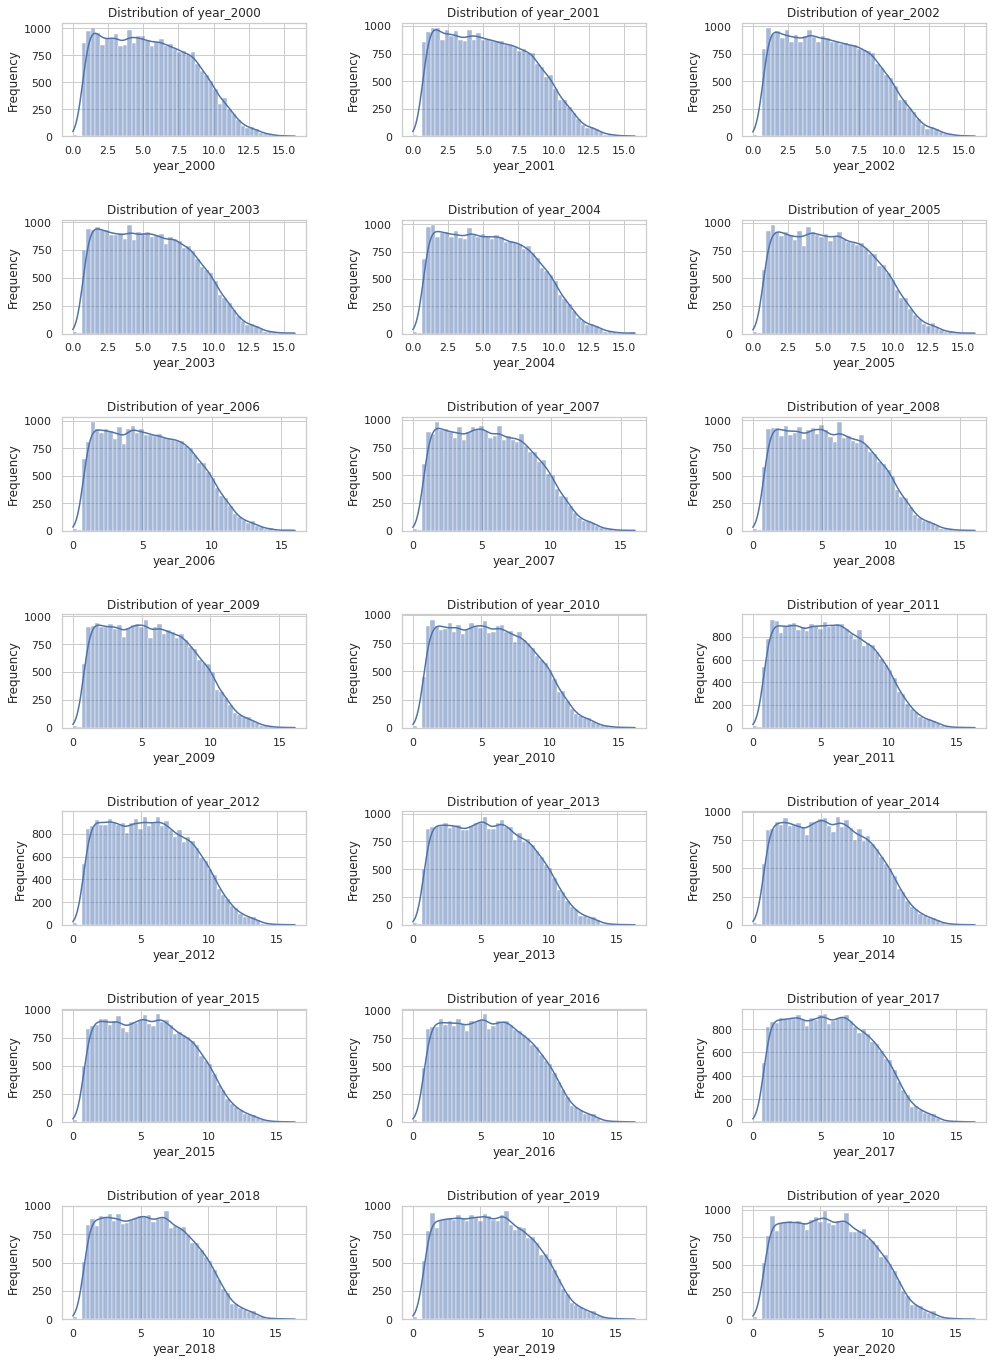

In [11]:
# Convert data to LogN

from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
years = [f'year_{year}' for year in range(2000, 2021)]
for year in years:
    merged_df = merged_df.withColumn(year, F.log1p(merged_df[year]))
# Collect data locally for visualization
local_data = merged_df.select(*years).toPandas()
# Generate a normal distribution plot of the data
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
fig.tight_layout(pad=5.0)
for i, year in enumerate(years):
    row = i // 3
    col = i % 3
    sns.histplot(local_data[year], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {year}')
    axes[row, col].set_xlabel(year)
    axes[row, col].set_ylabel('Frequency')
plt.show()

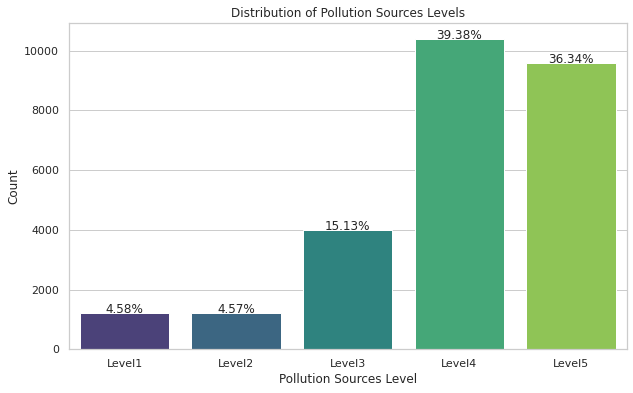

In [12]:
# Group data

from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
# Group data by Level_PollutionSources
level_counts = merged_df.groupBy("Level_PollutionSources").count().orderBy("Level_PollutionSources")
level_counts_df = level_counts.toPandas()
# Calculate percentage
level_counts_df['percentage'] = (level_counts_df['count'] / level_counts_df['count'].sum()) * 100
# Generate visualization diagram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=level_counts_df['Level_PollutionSources'], y=level_counts_df['count'], palette="viridis")
# Use enumerate to get the index of the patch
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(level_counts_df['percentage'].iloc[i]), ha="center")
plt.title('Distribution of Pollution Sources Levels')
plt.xlabel('Pollution Sources Level')
plt.ylabel('Count')
plt.show()

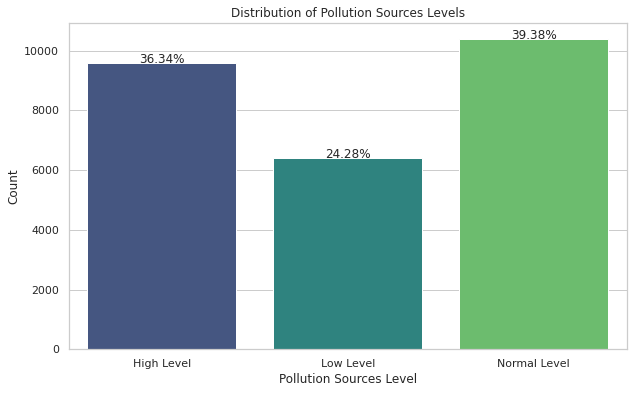

In [13]:
# Group data

from pyspark.sql import functions as F
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
# Define level mapping
level_mapping = {
    'Level1': 'Low Level',
    'Level2': 'Low Level',
    'Level3': 'Low Level',
    'Level4': 'Normal Level',
    'Level5': 'High Level'}
# Replace the value of the Level_PollutionSources column using PySpark's replace method
mapping_expr = F.create_map([F.lit(x) for x in chain(*level_mapping.items())])
merged_df = merged_df.withColumn("Level_PollutionSources", mapping_expr[merged_df["Level_PollutionSources"]])
# Group data by Level_PollutionSources
level_counts1 = merged_df.groupBy("Level_PollutionSources").count().orderBy("Level_PollutionSources")
level_counts1_df = level_counts1.toPandas()
level_counts1_df['percentage'] = (level_counts1_df['count'] / level_counts1_df['count'].sum()) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=level_counts1_df['Level_PollutionSources'], y=level_counts1_df['count'], palette="viridis")
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(level_counts1_df['percentage'].iloc[i]), ha="center")
plt.title('Distribution of Pollution Sources Levels')
plt.xlabel('Pollution Sources Level')
plt.ylabel('Count')
plt.show()

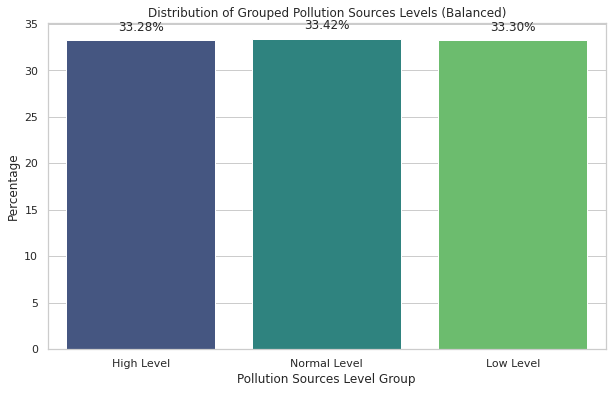

In [14]:
# Balance data

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, array, lit, rand
import matplotlib.pyplot as plt
import seaborn as sns
def oversample(df, target_col):
    # Calculate counts for each class
    class_counts = df.groupBy(target_col).count().collect()
    max_count = max([x['count'] for x in class_counts])
    dfs = []
    for class_count in class_counts:
        class_val = class_count[target_col]
        count = class_count['count']
        # Calculate the difference between max_count and current count
        diff = max_count - count
        # If the count is less than max_count, oversample
        if diff > 0:
            fraction = diff / count
            oversampled_df = df.where(col(target_col) == class_val).sample(withReplacement=True, fraction=fraction)
            dfs.append(oversampled_df)
        dfs.append(df.where(col(target_col) == class_val))
    balanced_df = dfs[0]
    for temp_df in dfs[1:]:
        balanced_df = balanced_df.union(temp_df)
    return balanced_df
# Perform oversampling
balanced_df = oversample(merged_df, 'Level_PollutionSources')
balanced_pd = balanced_df.groupBy('Level_PollutionSources').count().orderBy(rand()).toPandas()
total_count = balanced_pd['count'].sum()
balanced_pd['percentage'] = (balanced_pd['count'] / total_count) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=balanced_pd['Level_PollutionSources'], y=balanced_pd['percentage'], palette="viridis")
# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format(height),
            ha="center")
plt.title('Distribution of Grouped Pollution Sources Levels (Balanced)')
plt.xlabel('Pollution Sources Level Group')
plt.ylabel('Percentage')
plt.show()

In [15]:
# balanced_df
pandas_df5 = balanced_df.toPandas()
display(pandas_df5)

,Country,Country_ID,Item,Element,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,Record_Count,Level_PollutionSources,year_2020_Sum
0,Micronesia (Federated States of),141,All sectors without LULUCF,Emissions (CO2eq) (AR5),5.234312,5.311234,5.276072,5.331752,5.312220,5.197391,...,5.323010,5.361762,5.367843,5.366910,5.408516,5.476045,5.476882,20,Low Level,2449.3
1,Micronesia (Federated States of),141,Energy,Emissions (CO2eq) (AR5),4.859812,4.969813,4.919981,4.997212,4.969813,4.804021,...,4.919981,4.969813,4.969813,4.969813,5.023881,5.111988,5.105945,20,Low Level,2449.3
2,Micronesia (Federated States of),141,Farm-gate emissions,Emissions (CO2eq) (AR5),4.354141,4.384524,4.369448,4.388257,4.388257,4.403054,...,4.616110,4.622027,4.626932,4.620059,4.623010,4.634729,4.646312,20,Low Level,2449.3
3,Micronesia (Federated States of),141,Agri-food systems,Emissions (CO2eq) from CH4 (AR5),3.895894,3.899950,3.897924,3.903991,3.901973,3.906005,...,4.056989,4.072440,4.087656,4.084294,4.099332,4.122284,4.136765,20,Low Level,2449.3
4,Micronesia (Federated States of),141,All sectors with LULUCF,Emissions (CO2eq) from CH4 (AR5),3.860730,3.860730,3.862833,3.864931,3.864931,3.864931,...,4.005513,4.021774,4.039536,4.037774,4.053523,4.074142,4.089332,20,Low Level,2449.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31059,European Union (27),247,All sectors without LULUCF,Emissions (CO2),15.077822,15.101111,15.096714,15.114143,15.115725,15.111271,...,14.908656,14.927980,14.928599,14.936806,14.928573,14.885559,14.761195,40,High Level,31888900.4
31060,European Union (27),247,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),11.500770,11.434524,11.488923,11.532167,11.573378,11.626554,...,12.183390,12.231846,12.262874,12.275152,12.294402,12.261250,12.191680,40,High Level,31888900.4
31061,European Union (27),247,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),13.378679,13.359146,13.349657,13.337321,13.332384,13.310229,...,13.213602,13.210456,13.196214,13.196371,13.177716,13.150580,13.132421,40,High Level,31888900.4
31062,European Union (27),247,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),12.496725,12.481790,12.484370,12.487434,12.487961,12.486815,...,12.402744,12.409223,12.405858,12.411602,12.386345,12.368053,12.338391,40,High Level,31888900.4


06-DMA

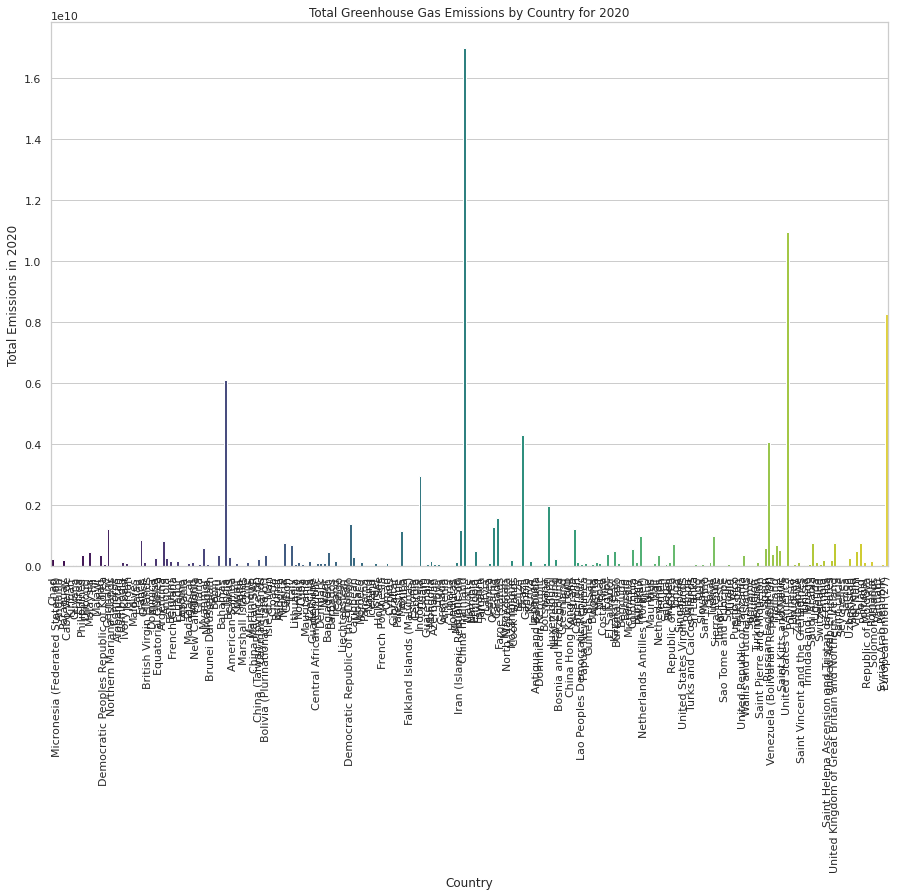

In [16]:
# Total Greenhouse Gas Emissions by Country for 2020

import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'Country' and sum 'year_2020_Sum'
country_sum_df = merged_df.groupBy('Country').agg({'year_2020_Sum': 'sum'})
# Convert to pandas for plotting
country_sum_pd = country_sum_df.toPandas()
# Plotting using matplotlib and seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=country_sum_pd['Country'], y=country_sum_pd['sum(year_2020_Sum)'], palette="viridis")
plt.xticks(rotation=90)
plt.title('Total Greenhouse Gas Emissions by Country for 2020')
plt.xlabel('Country')
plt.ylabel('Total Emissions in 2020')
plt.show()

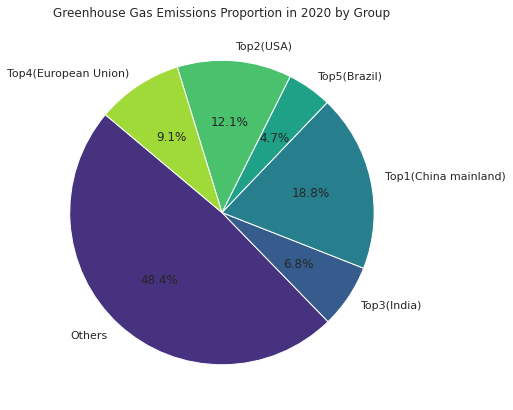

In [17]:
# Greenhouse Gas Emissions Proportion in 2020 by Group

from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, sum as _sum
import matplotlib.pyplot as plt
import seaborn as sns
# Label countries based on Country_ID
labeled_df = merged_df.withColumn(
    "Country",
    when(col("Country_ID") == 48, "Top1(China mainland)")
    .when(col("Country_ID") == 233, "Top2(USA)")
    .when(col("Country_ID") == 102, "Top3(India)")
    .when(col("Country_ID") == 247, "Top4(European Union)")
    .when(col("Country_ID") == 29, "Top5(Brazil)")
    .otherwise("Others"))
# Group by 'Country' and sum 'year_2020_Sum'
grouped_data = labeled_df.groupBy("Country").agg(_sum("year_2020_Sum").alias("year_2020_Sum"))
# Convert to pandas for plotting
grouped_pd = grouped_data.toPandas()
# Pie figure using matplotlib
plt.figure(figsize=(10, 7))
plt.pie(grouped_pd['year_2020_Sum'], labels=grouped_pd['Country'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(grouped_pd)))
plt.title('Greenhouse Gas Emissions Proportion in 2020 by Group')
plt.show()

23/10/07 23:58:48 WARN Instrumentation: [0f8166f8] regParam is zero, which might cause numerical instability and overfitting.
23/10/07 23:58:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/07 23:58:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/10/07 23:58:54 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Mean Squared Error: 90930485925599.06
Coefficients: [429107.0809660796]


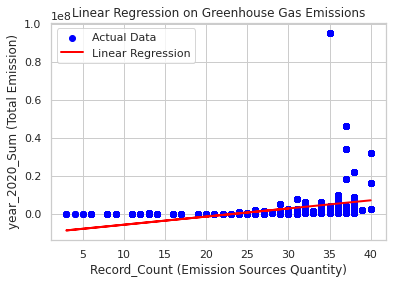

In [18]:
# training model

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
vector_assembler = VectorAssembler(inputCols=["Record_Count"], outputCol="features")
vmerged_data = vector_assembler.transform(merged_df)
# Partition the data set
train_data, test_data = vmerged_data.randomSplit([0.7, 0.3], seed=42)
# Initialize model
lr = LinearRegression(featuresCol='features', labelCol='year_2020_Sum')
# Training model
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)
train_score = lr_model.summary.r2
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="year_2020_Sum", metricName="r2")
test_score = evaluator.evaluate(predictions)
# Calculate mean square error
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
print(f"Mean Squared Error: {mse}")
# Get coefficient
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print("Coefficients:", coefficients)
plt.scatter([row["Record_Count"] for row in test_data.collect()], [row["year_2020_Sum"] for row in test_data.collect()], color='blue', label='Actual Data')
plt.plot([row["Record_Count"] for row in test_data.collect()], [row["prediction"] for row in predictions.collect()], color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression on Greenhouse Gas Emissions')
plt.xlabel('Record_Count (Emission Sources Quantity)')
plt.ylabel('year_2020_Sum (Total Emission)')
plt.legend()
plt.show()

Training Accuracy: 87.87%
Testing Accuracy: 87.31%


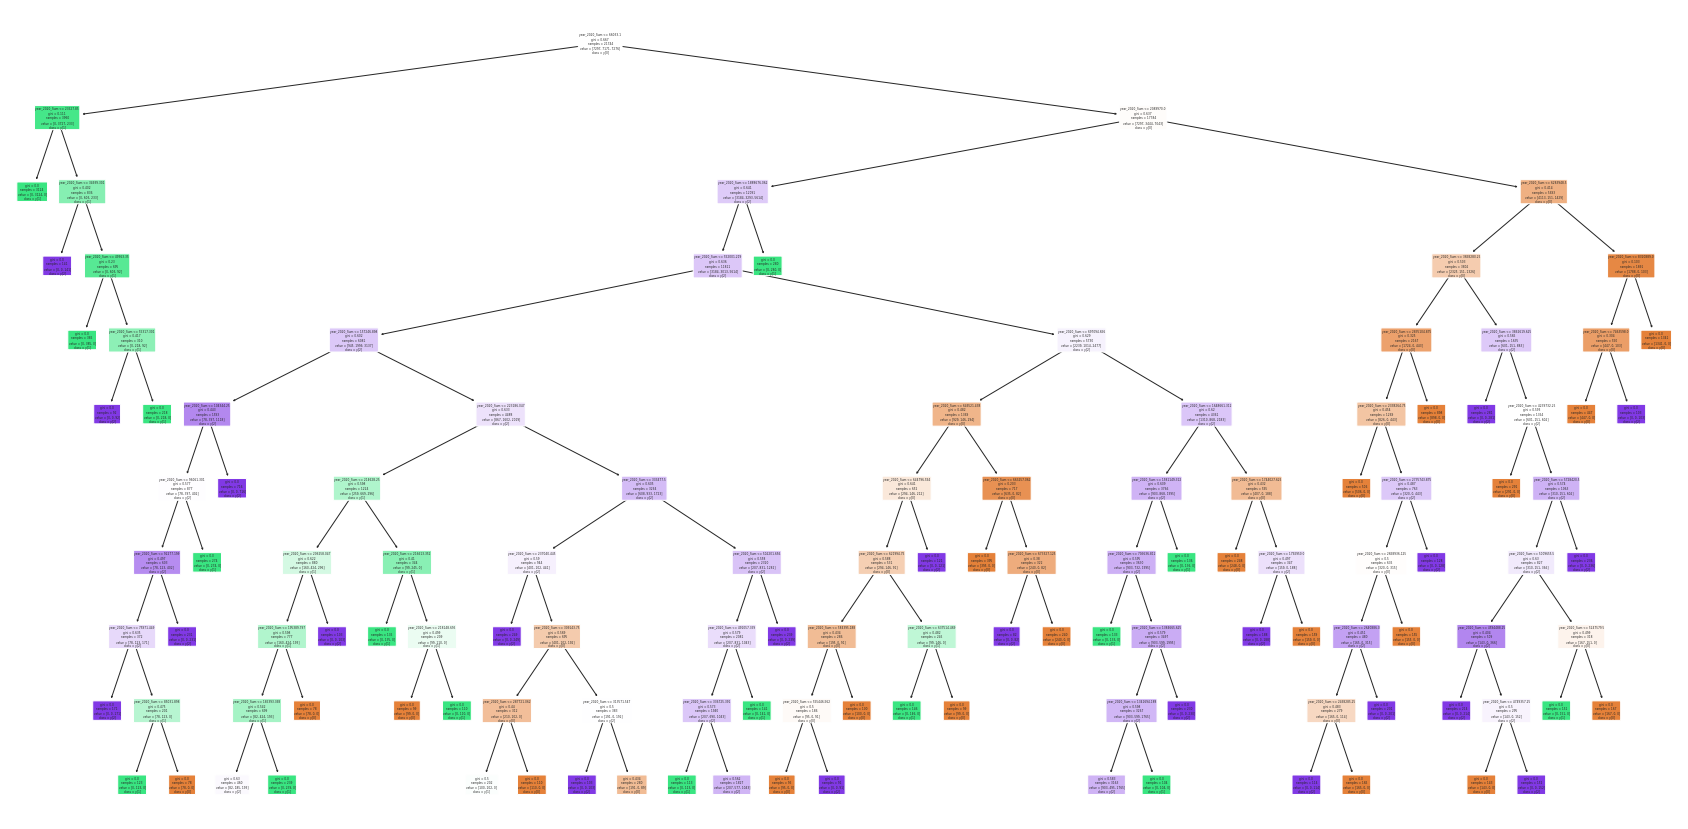

In [19]:
from pyspark.sql.functions import col
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
balanced_data_pd = balanced_df.select("year_2020_Sum", "Level_PollutionSources").toPandas()
X = balanced_data_pd[['year_2020_Sum']]
y = balanced_data_pd['Level_PollutionSources']
# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the decision tree and set the depth to 10
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
# Calculate training and test accuracy
train_accuracy = clf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
test_accuracy = clf.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

08-INT

Training Accuracy: 98.02%
Testing Accuracy: 97.99%


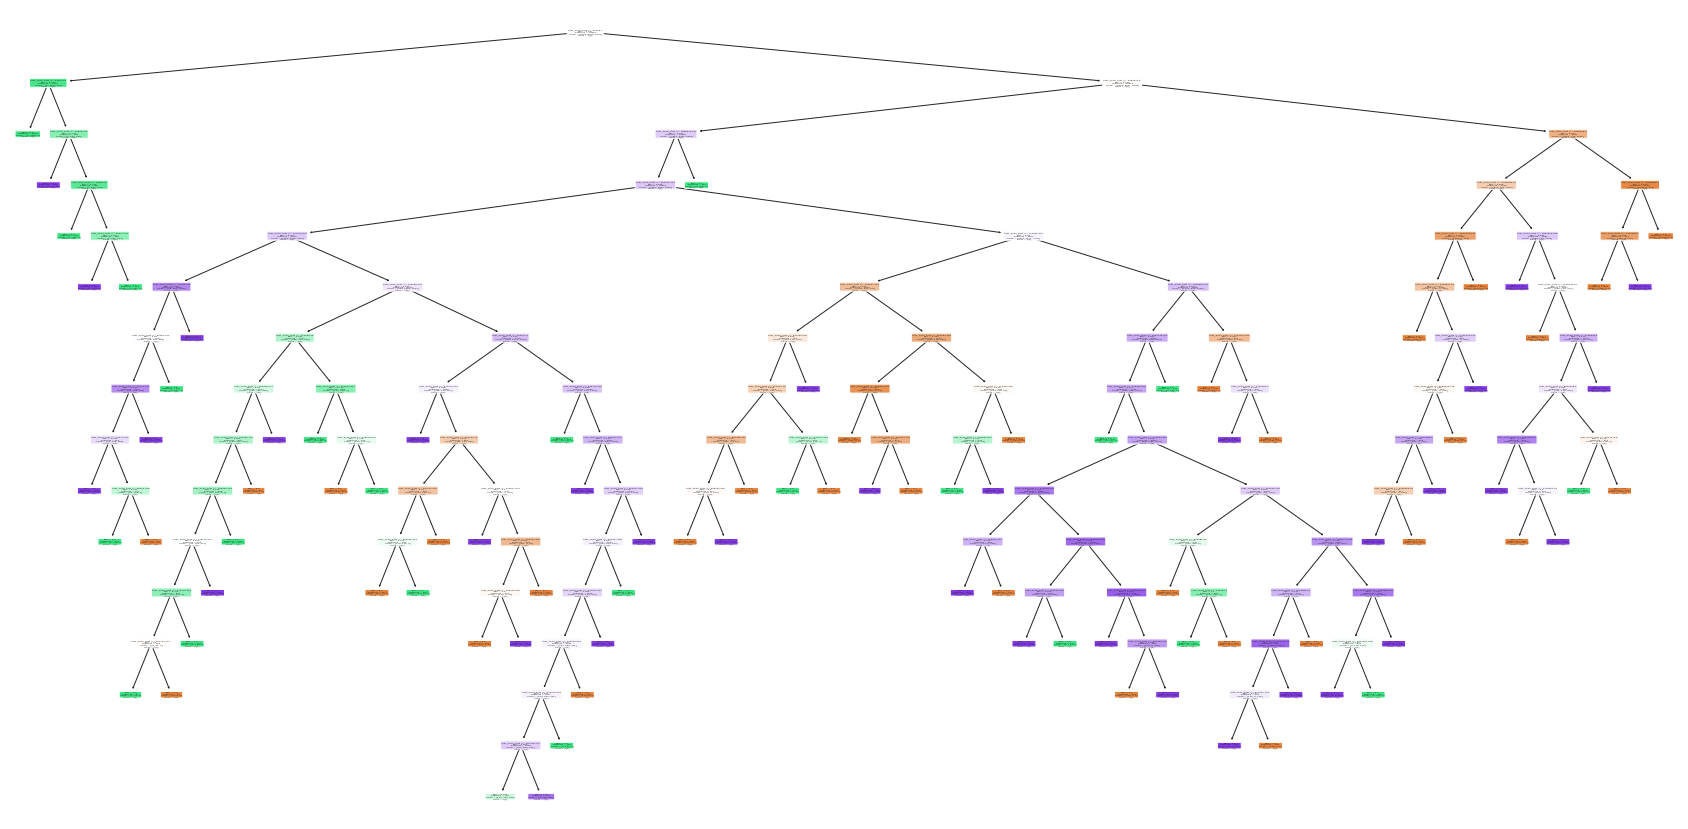

In [20]:
from pyspark.sql.functions import col
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
balanced_data_pd = balanced_df.select("year_2020_Sum", "Level_PollutionSources").toPandas()
X = balanced_data_pd[['year_2020_Sum']]
y = balanced_data_pd['Level_PollutionSources']
# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the decision tree and set the depth to 15
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)
# Calculate training and test accuracy
train_accuracy = clf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
test_accuracy = clf.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()